# Table of Content

1. Importation of libraries
2. Load the dataset
3. Check and drop the duplication
4. Check and treat the missing values
5. Data Exploration and Visualization
6. Calculate Recency 
7. Calculate Frequent
8. Calculate Monetary
9. Merge the rfm
10. Calculate the rfm score

In [92]:
# import the basice labraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 


In [93]:
# import the dataset
df= pd.read_csv("data.csv" , encoding= 'unicode_escape')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
# check the summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


The dataset consist of 8 columns and 541909 records, 4 of the columns(InvoicesNo , Stockcode, Description and Coutry) are object dtype, 2  are floats(UnitPrice and CustomerID) and (Quantity) is integer

# Duplicate

In [4]:
# check for duplicated
df.duplicated().sum()

5268

In [5]:
# drop all the duplicate
df.drop_duplicates(inplace=True)

# Missing Values

In [6]:
# compute the the values and the percentage of the missing values
missing_value = df.isna().sum()
missing_value = missing_value.reset_index().rename(columns={
    
            "index": "Column",
            0:'missing_value'
})


percentage = pd.DataFrame(df.isna().sum() * 100 / df.shape[0],).round(2)
percentage = percentage.reset_index().rename(columns={
    
            "index": "Column",
            0:'Missing_Percentage (%)'
})



Final = missing_value.merge(percentage, how = 'inner', left_on = 'Column', right_on = 'Column')
Final["Missing_Percentage (%..)"] = Final["Missing_Percentage (%)"].astype(str)
Final=Final[Final["missing_value"]>0]
Final

,Column,missing_value,Missing_Percentage (%),Missing_Percentage (%..)
2,Description,1454,0.27,0.27
6,CustomerID,135037,25.16,25.16


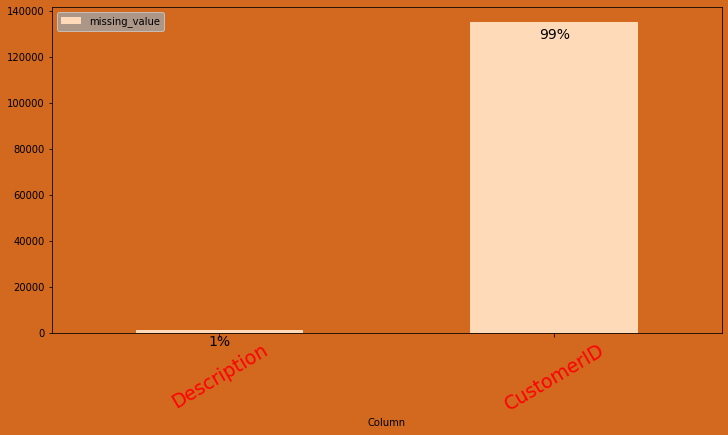

In [94]:
# visualize the missing values
fig, ax = plt.subplots(figsize=(12, 6), facecolor ="#D2691E")
ax.grid(True, alpha=.5, color="white")
ax.set_facecolor("#D2691E")
plot=Final.plot(kind="bar", x="Column", y="missing_value", ax=ax, color="#FFDAB9")
ax.tick_params(axis="x", labelcolor="red", labelsize=19, labelrotation=30.7)
for p in plot.patches:
    plot.annotate(format(round(p.get_height()/ Final.missing_value.values.sum()* 100), '.0f')+"%",
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   size=14,
                   xytext=(0, -12),
                   textcoords='offset points')
plt.show()
plt.show()

Two columns(Description, Quantity ) consist of null values. we will be dealing with them later on

# Treating the missing values

First i checked the dataset where the Description column having missing value.then i notice that the UnitPrice column records is 0s and the customer column  also consist of NAN value. It will be ideal to drop all the nan values

In [95]:
# check the reason for missing values
df[df.Description.isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,12/1/2010 14:32,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,12/1/2010 14:34,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,12/7/2011 18:26,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,12/7/2011 18:31,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,12/7/2011 18:35,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,12/8/2011 10:33,0.0,NaN,United Kingdom


In [108]:
# drop the missing values
df.dropna(inplace=True)

Sometimes, missing values are filled with some denotations. "NAN", "na", "?", "Unknown", and so on. Let's check them.

In [10]:
df[df.Description.str.len() < 5]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


Now that we are done treating the missing values, we can then further to data exploration and visualation

# InvoiceNo Column

In [96]:
# count the values iin InvoiceNo
df.InvoiceNo.value_counts()

573585     1114
581219      749
581492      731
580729      721
558475      705
           ... 
554023        1
554022        1
554021        1
554020        1
C558901       1
Name: InvoiceNo, Length: 25900, dtype: int64

InvoiceNo has coded with 6 digit numeric characters. We can see that some InvoiceNo records starts with the letter C. This means cancellation. I go futher to segregate all the cancellation


In [97]:
# form a column for all InvoiceNo with C
df["cancellation"] = df["InvoiceNo"].apply(lambda x: 1 if ("C" in x) else 0)

after segregating, i went further to check if the cancellation mean cancelling of preorder product. checked Through the InvoiceNo

In [98]:
# filter out the C in InvoiceNo 
cancellation=df[df["cancellation"]==1]["InvoiceNo"].to_list()
cancellation = [x[1:] for x in callencation]
cancellation[:5]

['36379', '36383', '36391', '36391', '36391']

In [99]:
# check if the InvoiceNo present in cancellation numbers 
(df[df["InvoiceNo"].isin (callencation)])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cancellation


from what i see, cancellation is just cancellation, has no meaning in relation to order at hand.

Since the cancellation has no relation in the dataset, i  will filter them  out

In [100]:
df= df[df["cancellation"]==0]

In [101]:
#sns.displot(df["InvoiceNo"])

# StockCode **and** Description

In [17]:
df.StockCode.value_counts()

85123A    2023
22423     1714
85099B    1615
84879     1395
47566     1390
          ... 
20678        1
90059D       1
90168        1
90169        1
23843        1
Name: StockCode, Length: 3665, dtype: int64

Stock Codes generally contains 5 digit numerical codes.

In [18]:
df.StockCode.str.contains("^[a-zA-Z]").value_counts()

False    391183
True       1549
Name: StockCode, dtype: int64

I check if the stockcode column consist of character. And 1549 records consist of character, let print them out to see if there is any partner

In [102]:
# filter the character in StockCode column
df[df.StockCode.str.contains("^[a-zA-Z]")]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cancellation
45,536370,POST,POSTAGE,3,12/1/2010 8:45,18.00,12583.0,France,0
386,536403,POST,POSTAGE,1,12/1/2010 11:27,15.00,12791.0,Netherlands,0
1123,536527,POST,POSTAGE,1,12/1/2010 13:04,18.00,12662.0,Germany,0
1423,536540,C2,CARRIAGE,1,12/1/2010 14:05,50.00,14911.0,EIRE,0
1814,536544,DOT,DOTCOM POSTAGE,1,12/1/2010 14:32,569.77,NaN,United Kingdom,0
...,...,...,...,...,...,...,...,...,...
541216,581494,POST,POSTAGE,2,12/9/2011 10:13,18.00,12518.0,Germany,0
541540,581498,DOT,DOTCOM POSTAGE,1,12/9/2011 10:26,1714.17,NaN,United Kingdom,0
541730,581570,POST,POSTAGE,1,12/9/2011 11:59,18.00,12662.0,Germany,0
541767,581574,POST,POSTAGE,2,12/9/2011 12:09,18.00,12526.0,Germany,0


it can be see that those character are the shorthand for the Description. what i can do again is to check if the related  Description has difference meaning in stockcode

In [105]:
manual_check=df.query("Description=='Manual' ")
manual_check

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cancellation
2239,536569,M,Manual,1,12/1/2010 15:35,1.25,16274.0,United Kingdom,0
2250,536569,M,Manual,1,12/1/2010 15:35,18.95,16274.0,United Kingdom,0
5684,536865,M,Manual,1,12/3/2010 11:28,2.55,NaN,United Kingdom,0
6798,536981,M,Manual,2,12/3/2010 14:26,0.85,14723.0,United Kingdom,0
7976,537077,M,Manual,12,12/5/2010 11:59,0.42,17062.0,United Kingdom,0
...,...,...,...,...,...,...,...,...,...
526015,580645,M,Manual,1,12/5/2011 13:11,219.50,17857.0,United Kingdom,0
526018,580646,M,Manual,800,12/5/2011 13:13,0.25,17857.0,United Kingdom,0
530876,580884,M,Manual,1,12/6/2011 12:21,0.85,15907.0,United Kingdom,0
531432,580956,M,Manual,4,12/6/2011 14:23,1.25,17841.0,United Kingdom,0


In [110]:
# check if the Stockcode have different meaning 
manual_check[manual_check["StockCode"]!="M"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cancellation


No other meaning. the best pratice is to replace those shorthand character with their proper code but since they not available, i will leave them as they are and move on to the next step

In [111]:
# count the values of Stockcode
df.StockCode.value_counts()

85123A    2035
22423     1724
85099B    1618
84879     1408
47566     1397
          ... 
90168        1
90169        1
90202A       1
90118        1
23843        1
Name: StockCode, Length: 3665, dtype: int64

In [112]:
# count the values of Description 
df.Description.value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    2028
REGENCY CAKESTAND 3 TIER              1724
JUMBO BAG RED RETROSPOT               1618
ASSORTED COLOUR BIRD ORNAMENT         1408
PARTY BUNTING                         1397
                                      ... 
RUBY GLASS CLUSTER EARRINGS              1
PINK CHRYSANTHEMUMS ART FLOWER           1
72 CAKE CASES VINTAGE CHRISTMAS          1
WALL ART , THE MAGIC FOREST              1
PAPER CRAFT , LITTLE BIRDIE              1
Name: Description, Length: 3877, dtype: int64

I count the values of Description and the Stockcode and i realise that their length is not the same. I will check why!

In [24]:
df.query("StockCode=='85123A'").groupby("Description", as_index=False)["StockCode"].count()

,Description,StockCode
0,CREAM HANGING HEART T-LIGHT HOLDER,7
1,WHITE HANGING HEART T-LIGHT HOLDER,2016


In [25]:
df.query("StockCode=='17107D'").groupby("Description", as_index=False)["StockCode"].count()

,Description,StockCode
0,FLOWER FAIRY 5 DRAWER LINERS,20
1,FLOWER FAIRY 5 SUMMER DRAW LINERS,1
2,"FLOWER FAIRY,5 SUMMER B'DRAW LINERS",25


From the analysis above, it can be seen that, there some closely related Description entries with the same StockCode, that is  why the length of Description is more than length of StockCode. Since the description are closely related, i assume, they might share the same stockCode 

# quantity column

In [26]:
df.Quantity.describe()

count    392732.000000
mean         13.153718
std         181.588420
min           1.000000
25%           2.000000
50%           6.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

The pattern in quantity column seem okay, I will visualize the top 15 Customer with highest Quantity purchased

# Visualize the top 15 Customer with highest Quantity purchased

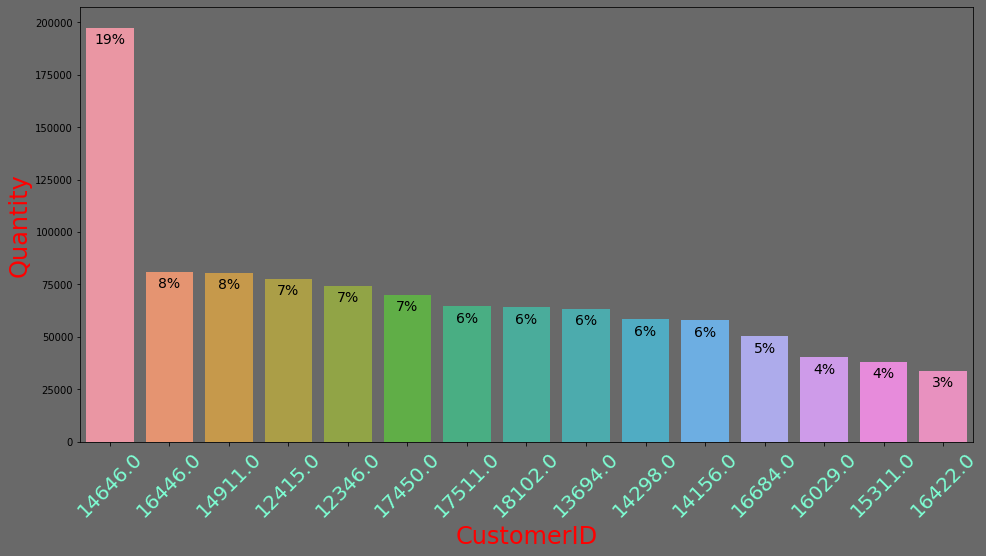

In [113]:
sum_of_quantity_per_customer= df.groupby("CustomerID").agg({"Quantity": "sum"}).sort_values(by="Quantity",
                                                                                            ascending=False).head(15)


fig, ax = plt.subplots(figsize=(16,8), facecolor=("#696969"))
ax.set_facecolor("#696969")
plot=sns.barplot(x=sum_of_quantity_per_customer.index, y=sum_of_quantity_per_customer["Quantity"],
            order=sum_of_quantity_per_customer.index, ax=ax)
ax.tick_params(axis="x", labelcolor="#7FFFD4", labelrotation=45, labelsize=20)
ax.set_xlabel("CustomerID", color="red", fontsize=24)
ax.set_ylabel("Quantity", color="red", fontsize=24)

for p in plot.patches:
    plot.annotate( format(round(p.get_height()/ sum_of_quantity_per_customer.Quantity.values.sum()*100), '.0f') +"%",

               (p.get_x() + p.get_width() / 2., p.get_height()),

               ha='center', va='center',
               size=14,
               xytext=(0, -12),
               textcoords='offset points')
plt.show()

the plot above shows the customers_id with over all sum of quantities product purchase

# UnitPrice Column

In [114]:
# UnitPrice Describtion analysis
df.UnitPrice.describe()

count    397924.000000
mean          3.116174
std          22.096788
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: UnitPrice, dtype: float64

from above checked i notice the minimum uniPrice is 0, which does not make sense. so let check it out

In [115]:
df.query("UnitPrice==0").head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cancellation
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,12/5/2010 14:02,0.0,12647.0,Germany,0
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,12/16/2010 14:36,0.0,16560.0,United Kingdom,0
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,12/21/2010 13:45,0.0,14911.0,EIRE,0
47068,540372,22090,PAPER BUNTING RETROSPOT,24,1/6/2011 16:41,0.0,13081.0,United Kingdom,0
47070,540372,22553,PLASTERS IN TIN SKULLS,24,1/6/2011 16:41,0.0,13081.0,United Kingdom,0


No pattern, this could be as a result of typing error, as there are values for quantity order, unit price can not be zero. For simplicity i will filter them out

In [116]:
# filter out unitPrice when the values is Zero(outlier)
df = df[df["UnitPrice"]>0]

# Visualize the distribution of the UnitPrice

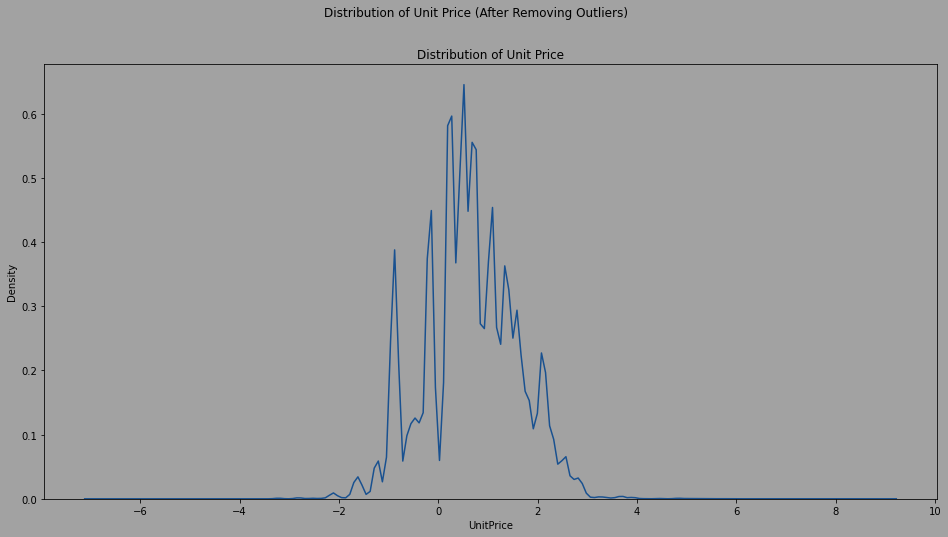

In [117]:
# Visualize the distribution of the UnitPrice
#plt.rcParams["axes.grid"] = 1
fig, ax = plt.subplots(figsize=(16,8), facecolor="#A2A2A2")
ax.set_facecolor("#A2A2A2")
sns.kdeplot(data=np.log(df["UnitPrice"]), ax=ax, color="#195190").set_title("Distribution of Unit Price")

fig.suptitle("Distribution of Unit Price (After Removing Outliers)")
plt.show()

# Country column

In [33]:
df.Country.value_counts().head(10)

United Kingdom    349203
Germany             9025
France              8326
EIRE                7226
Spain               2479
Netherlands         2359
Belgium             2031
Switzerland         1841
Portugal            1453
Australia           1181
Name: Country, dtype: int64

The pattern in country seem okay, i will visualize  Top 10 Countries with highest customer

# Top 10 Countries with highest customer

Text(0.5, 1.0, 'Top 10 Countries with highest customer')

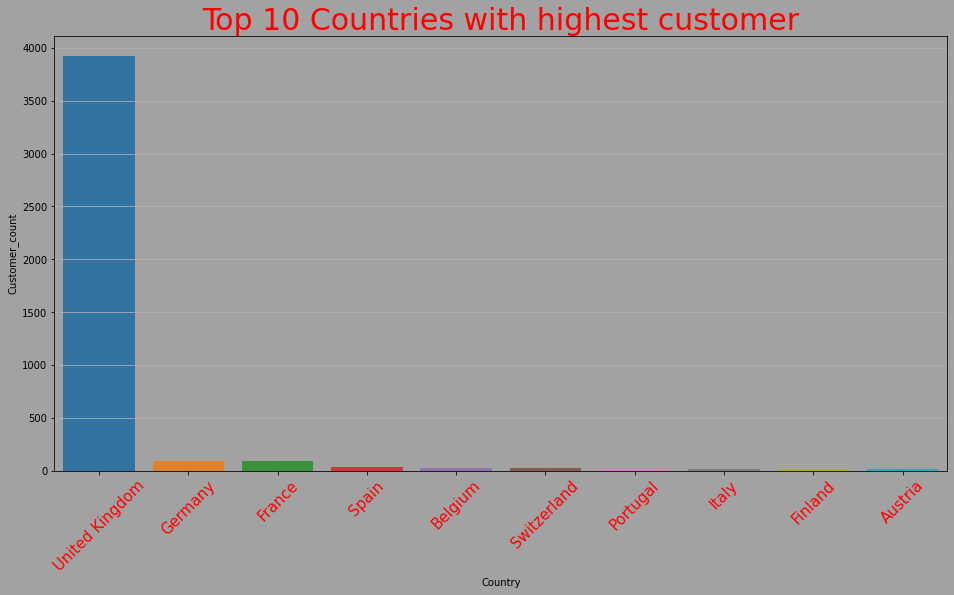

In [118]:
top_country_cus=df.groupby([ "Country"]).nunique()[["CustomerID"]].rename(columns={"CustomerID": "Customer_count"})
top_country_cus=top_country_cus.sort_values("Customer_count", ascending=False).head(10)
fig, ax = plt.subplots(figsize=(16,8), facecolor="#A2A2A2")
ax.grid(True)
ax.set_facecolor("#A2A2A2")
plot= sns.barplot(x=top_country_cus.index, y= top_country_cus["Customer_count"])
ax.tick_params(axis="x", labelrotation=45, labelcolor="red", labelsize=15)
plt.title("Top 10 Countries with highest customer", color="red", fontsize=30)

In [119]:
# drop the cancellation column
df.drop(columns="cancellation", inplace=True)

In [120]:
# find the total price of the product
df["Total_Price"] = df[ "Quantity"] * df["UnitPrice"]

In [121]:
# convert the date object to datetime
df.loc[:, "InvoiceDate"]= pd.to_datetime(df["InvoiceDate"])

In [122]:
# print the 5 row of the clean data
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


# RFM ANASISLY

# Calculating Recency
Here we are calculating recency for customers who had made a purchase with a company.

The difference between the reference date and maximum date in the dataframe for each customer(which is the recent visit) is Recency 

In [123]:
df_recency = df.groupby("CustomerID", as_index=False)["InvoiceDate"].max()
df_recency.columns = ['CustomerID', 'LastPurchaseDate']
recent_date = df_recency['LastPurchaseDate'].max()
df_recency['Recency'] = df_recency['LastPurchaseDate'].apply(lambda x: (recent_date - x).days)
df_recency.head()

,CustomerID,LastPurchaseDate,Recency
0,12346.0,2011-01-18 10:01:00,325
1,12347.0,2011-12-07 15:52:00,1
2,12348.0,2011-09-25 13:13:00,74
3,12349.0,2011-11-21 09:51:00,18
4,12350.0,2011-02-02 16:01:00,309


<Figure size 576x360 with 0 Axes>

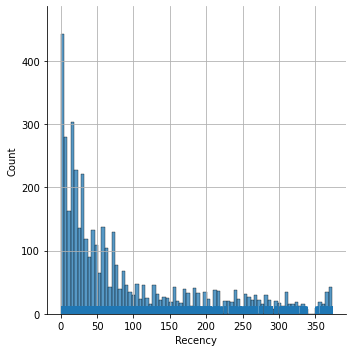

In [44]:
# visualize the distribution of df_recency
plt.figure(figsize=(8,5))
sns.displot(df_recency.Recency,bins=80,kde=False,rug=True)
plt.show()

We can see the customers who come within first 2 months are more and there are some customers that didn’t order more than a year. This way we can identify the customer and target them differently. 

# Calculating Frequency
We are here calculating the frequency of frequent transactions of the customer in ordering/buying some product from the company.

We can get the Frequency of the customer by summing up the number of orders.

In [125]:
frequency_df = df.groupby('CustomerID', as_index=False).agg({"InvoiceNo":"nunique"})
frequency_df.columns = ['CustomerID', 'Frequency']
frequency_df.head()


,CustomerID,Frequency
0,12346.0,1
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1


<Figure size 576x360 with 0 Axes>

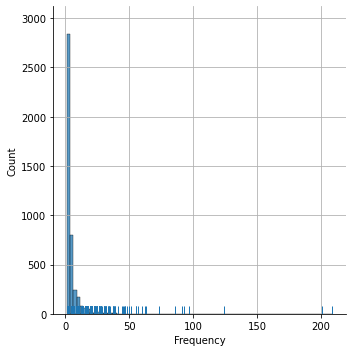

In [46]:
# visualize the distribution of frequency_df
plt.figure(figsize=(8,5))
sns.displot(frequency_df.Frequency,bins=80,kde=False,rug=True)
plt.show()

# Calculating Monetary Value
Here we are calculating the monetary value of customer spend on purchasing products from the company.

Monetary can be calculated as the sum of the Amount of all orders by each customer.

In [47]:
monetary_df = df.groupby(by='CustomerID', as_index=False)['Total_Price'].sum()
monetary_df.columns = ['CustomerID', 'Monetary']
monetary_df.head()


,CustomerID,Monetary
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


<Figure size 576x360 with 0 Axes>

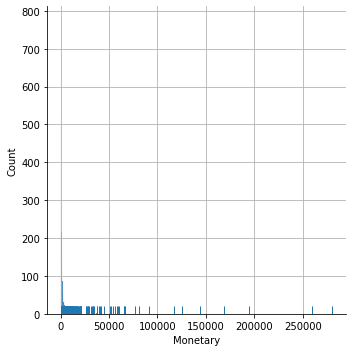

In [48]:
plt.figure(figsize=(8,5))
sns.displot(monetary_df.Monetary,kde=False,rug=True)


# merge RFM

In [49]:
rfm_df = df_recency.merge(frequency_df, on='CustomerID').merge(monetary_df, on='CustomerID').drop(
            columns='LastPurchaseDate')
rfm_df.head()


,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,1,7,4310.00
2,12348.0,74,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,309,1,334.40


# Frequency vs  Recency

<AxesSubplot:xlabel='Recency', ylabel='Frequency'>

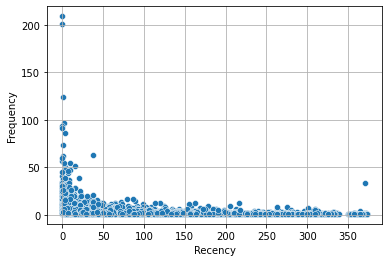

In [50]:
# plot a scatter plot of frequency and Recency
sns.scatterplot(y=rfm_df.Frequency, x=rfm_df.Recency)

We can see the customers whose Recency is less than a month have high Frequency i.e the customers buying more when their recency is less.

<AxesSubplot:xlabel='Monetary', ylabel='Recency'>

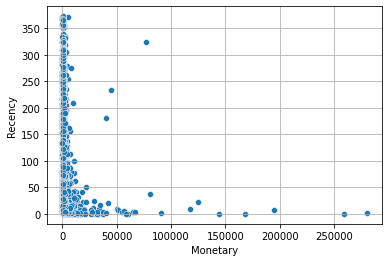

In [51]:
# plot a scatter plot of Monetary and Recency
sns.scatterplot(y=rfm_df.Recency, x=rfm_df.Monetary)

<AxesSubplot:xlabel='Monetary', ylabel='Frequency'>

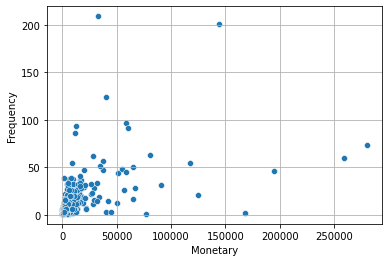

In [52]:
# plot a scatter plot of Monetary and Frequency
sns.scatterplot(y=rfm_df.Frequency, x=rfm_df.Monetary)

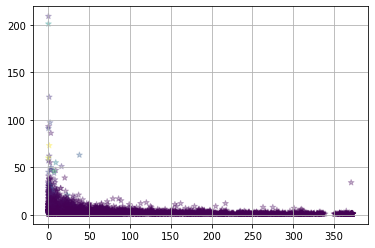

In [53]:
plt.scatter(rfm_df.Recency , rfm_df.Frequency,
            marker = '*', alpha = 0.3,c=rfm_df.Monetary)

# How do we Segment:
Depending on the Company’s objectives, Customers can be segmented in several ways. so that it is financially possible to make marketing campaigns.


## Calculate RFM Scoring

The simplest way to create customer segments from an RFM model is by using **Quartiles**. We will assign a score from 1 to 5 to each category (Recency, Frequency, and Monetary) with 5 being the highest/best value. The final RFM score is calculated by combining all RFM values. For Customer Segmentation, you will use the df_rfm data set resulting from the RFM analysis.

# Rating of the customer

**Champions**: Bought recently, buy often and spend the most

**Loyal customers**: Buy on a regular basis. Responsive to promotions.

**Potential loyalist**: Recent customers with average frequency.

**Recent customers**: Bought most recently, but not often.

**Promising**: Recent shoppers, but haven’t spent much.

**Needs attention**: Above average recency, frequency and monetary values. May not have bought very recently though.

**About to sleep**: Below average recency and frequency. Will lose them if not reactivated.

**At risk**: Some time since they’ve purchased. Need to bring them back!

**Can’t lose them**: Used to purchase frequently but haven’t returned for a long time.

**Hibernating**: Last purchase was long back and low number of orders. May be lost.

*https://futurice.com/blog/know-your-customers-with-rfm

In [126]:
# Divide the df_rfm into quarters
r_labels = range(5, 0, -1)
fm_labels = range(1, 6)

rfm_df["R"] = pd.qcut(rfm_df["Recency"], 5, labels = r_labels)
rfm_df["F"] = pd.qcut(rfm_df["Frequency"].rank(method = 'first'), 5, labels = fm_labels)
rfm_df["M"] = pd.qcut(rfm_df["Monetary"], 5, labels = fm_labels)

rfm_df.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,Segment
2983,16412.0,53,1,135.99,3,1,1,321,6,About To Sleep
1569,14485.0,38,1,162.80,3,1,1,311,5,About To Sleep
2930,16345.0,43,1,565.46,3,1,3,323,8,About To Sleep
1568,14484.0,49,1,321.92,3,1,2,312,6,About To Sleep
178,12571.0,39,2,519.61,3,2,3,323,8,About To Sleep


In [55]:
rfm_df["RFM_Segment"] = rfm_df["R"].astype(str) + rfm_df["F"].astype(str) + rfm_df["M"].astype(str)
rfm_df["RFM_Score"] = rfm_df[["R", "F", "M"]].sum(axis = 1)

rfm_df.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score
0,12346.0,325,1,77183.60,1,1,5,115,7
1,12347.0,1,7,4310.00,5,5,5,555,15
2,12348.0,74,4,1797.24,2,4,4,244,10
3,12349.0,18,1,1757.55,4,1,4,414,9
4,12350.0,309,1,334.40,1,1,2,112,4


In [71]:
segt_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At-Risk',
    r'[1-2]5': 'Cannot lose them',
    r'3[1-2]': 'About To Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}
rfm_df['Segment'] = rfm_df['R'].astype(str) + rfm_df['F'].astype(str)
rfm_df['Segment'] = rfm_df['Segment'].replace(segt_map, regex=True)
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,Segment
2983,16412.0,53,1,135.99,3,2,1,321,6,About To Sleep
388,12838.0,33,2,671.95,3,2,3,323,8,About To Sleep
3229,16753.0,57,1,223.92,3,2,1,321,6,About To Sleep
931,13594.0,52,1,396.97,3,1,2,312,6,About To Sleep
4164,18053.0,70,1,300.02,3,2,2,322,7,About To Sleep


We can show table of descriptive statistics for RFM segments, but it is not best way. Using data visualization skills and creating great plots as important as finding great results.

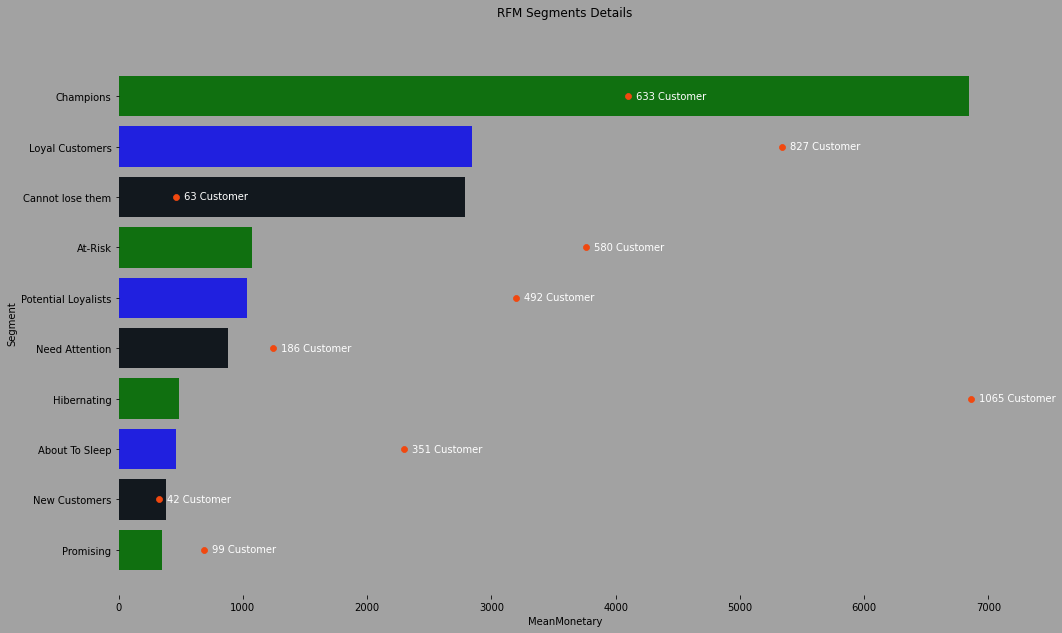

In [74]:
rfm_table2 = rfm_df.reset_index()

rfm_monetary_size = rfm_table2.groupby("Segment").agg({"Monetary": "mean",
                                                       "CustomerID": "nunique"})

rfm_monetary_size.rename(columns = {"Monetary": "MeanMonetary", "CustomerID": "CustomerCount"}, inplace = True)
rfm_monetary_size = rfm_monetary_size.sort_values("MeanMonetary", ascending = False)


plt.rcParams["axes.facecolor"] = "#A2A2A2"
fig, ax = plt.subplots(figsize = (16, 10), facecolor = "#A2A2A2")

sns.barplot(x = rfm_monetary_size.MeanMonetary, y = rfm_monetary_size.index, ax = ax, palette=["green", "blue","#101820"])
ax2 = ax.twiny()
sns.lineplot(x = rfm_monetary_size.CustomerCount, y = rfm_monetary_size.index, ax = ax2, marker = "o", linewidth = 0,
             color = "#F1480F", markeredgecolor = "#F1480F")


ax2.axis("off")

for y, x in list(enumerate(rfm_monetary_size.CustomerCount)):
    ax2.text(x + 10, y+ 0.05 , str(x) + " Customer", color = "white", fontweight = "normal")

plt.title("RFM Segments Details")
sns.despine(left = True, right = True, bottom = True, top = True)
plt.show()

In [75]:
rfm = rfm_table2.groupby("Segment").agg({"CustomerID": "nunique", 
                                        "Recency": "mean",
                                        "Frequency": "mean",
                                        "Monetary": "mean"})
rfm.rename(columns = {"CustomerID": "Segment Size"}, inplace = True)

cm = sns.light_palette("#A2A2A2", as_cmap = True)

rfm.T.style.background_gradient(cmap = cm, axis = 1)\
.set_precision(2)\
.highlight_min(axis = 1, color = "#195190")\
.highlight_max(axis = 1, color = "#D60000")

<ipython-input-75-ca5cc2a45984>:9: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  rfm.T.style.background_gradient(cmap = cm, axis = 1)\


Segment,About To Sleep,At-Risk,Cannot lose them,Champions,Hibernating,Loyal Customers,Need Attention,New Customers,Potential Loyalists,Promising
Segment Size,351.00,580.00,63.00,633.00,1065.00,827.00,186.00,42.00,492.00,99.00
Recency,52.50,154.06,131.43,4.88,216.90,32.47,52.06,5.86,16.12,22.44
Frequency,1.16,2.86,8.38,12.41,1.10,6.46,2.33,1.00,2.01,1.00
Monetary,459.00,1072.89,2790.10,6843.16,486.69,2848.33,884.24,385.02,1030.11,353.34


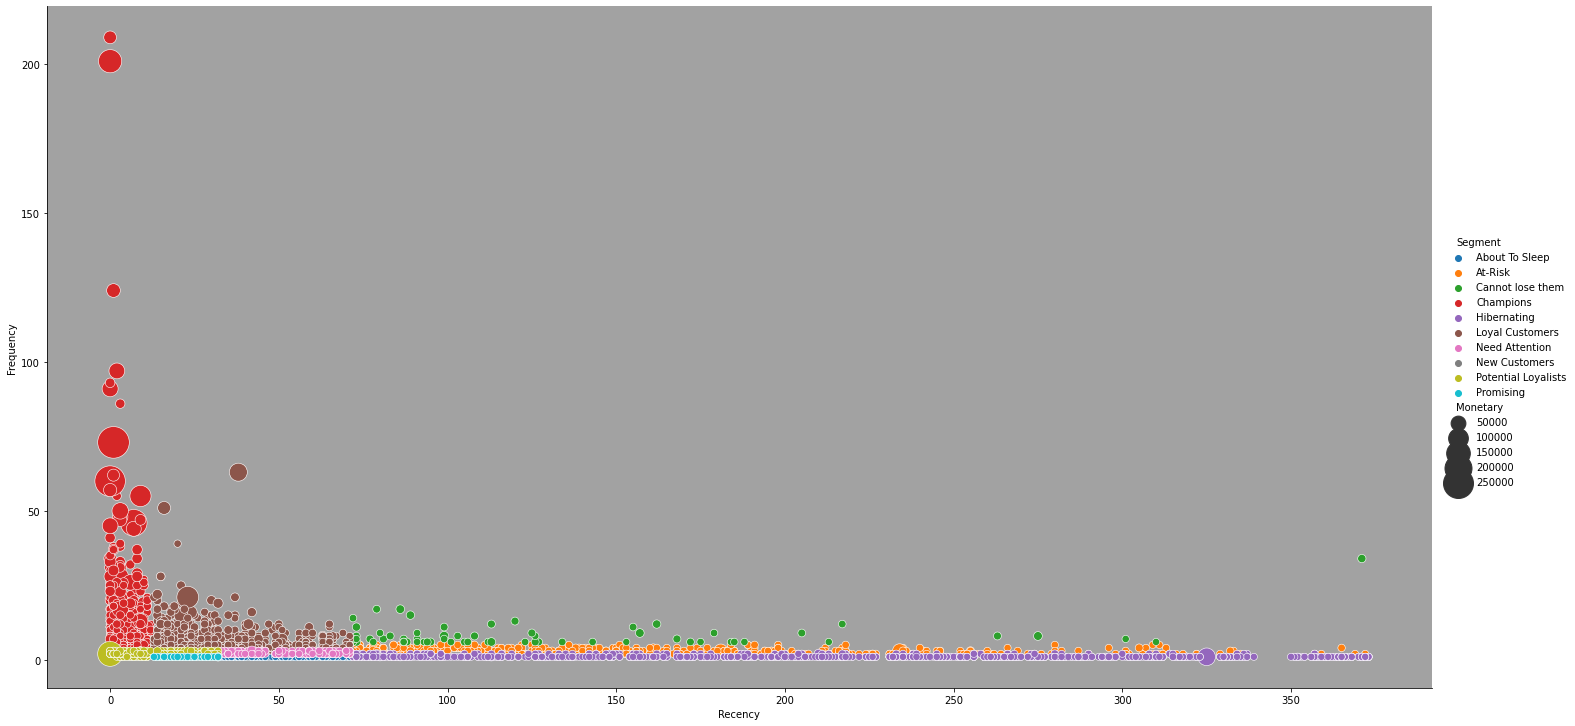

In [76]:
#plt.rcParams["axes.facecolor"] = "#A2A2A2"
plt.rcParams["axes.grid"] = False

sns.relplot(x = "Recency", y = "Frequency", hue = "Segment", size = "Monetary", data = rfm_table2,# palette = palette,
            height = 10, aspect = 2, sizes = (50, 1000))

plt.show()

In [77]:
monetary_per_segment = (rfm_table2.groupby("Segment")["Monetary"].sum() / 
                        rfm_table2.groupby("Segment")["Monetary"].sum().sum()).sort_values(ascending = False)

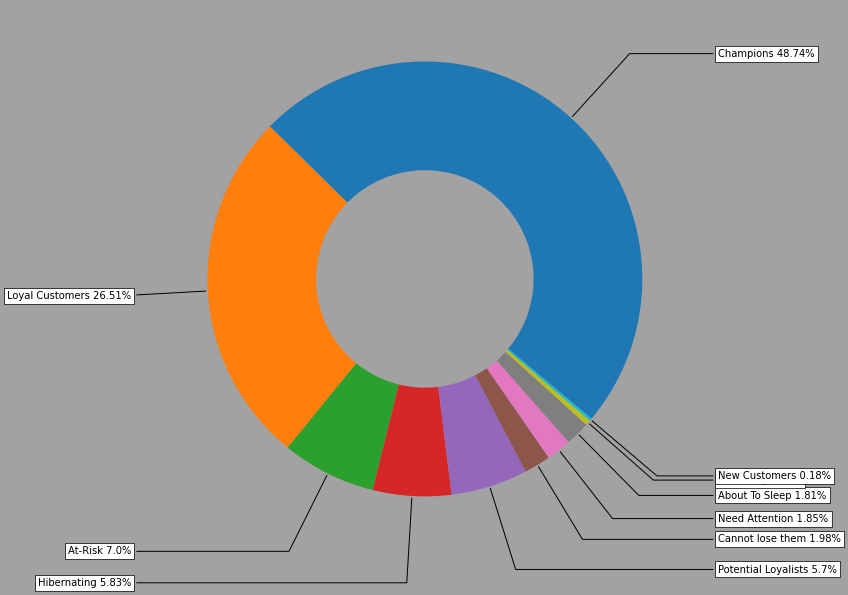

In [78]:
fig, ax = plt.subplots(figsize = (10, 10), facecolor = "#A2A2A2")

wedges, texts = ax.pie(monetary_per_segment.values, wedgeprops=dict(width=0.5), 
                       startangle=-40, normalize=False)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(monetary_per_segment.index[i] + " " + str(round(monetary_per_segment[i] * 100, 2)) + "%", xy=(x, y), 
                xytext=(1.35*np.sign(x), 1.4*y),horizontalalignment=horizontalalignment, **kw)
plt.show()

48.7% of total revenue comes from "Champions" segment, and 26.5% of total revenue comes from "Loyal Customers" segment. These two segments have 75% of company's total revenue.

C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 1080x1080 with 0 Axes>

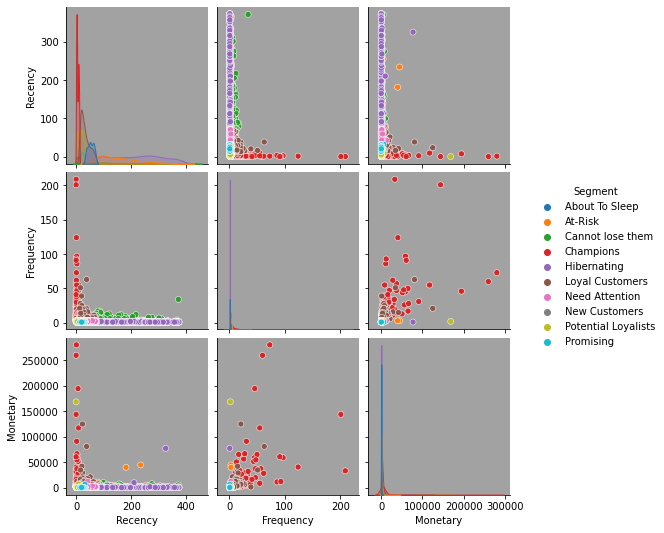

In [79]:
plt.figure(figsize=(15,15))
rfm_df=rfm_df.sort_values('Segment')
sns.pairplot(rfm_df[['Recency', 'Frequency', 'Monetary','Segment']],hue='Segment')

**Explanation:**
* There is no so clear meaningful pattern in this graph. It needs scaling.

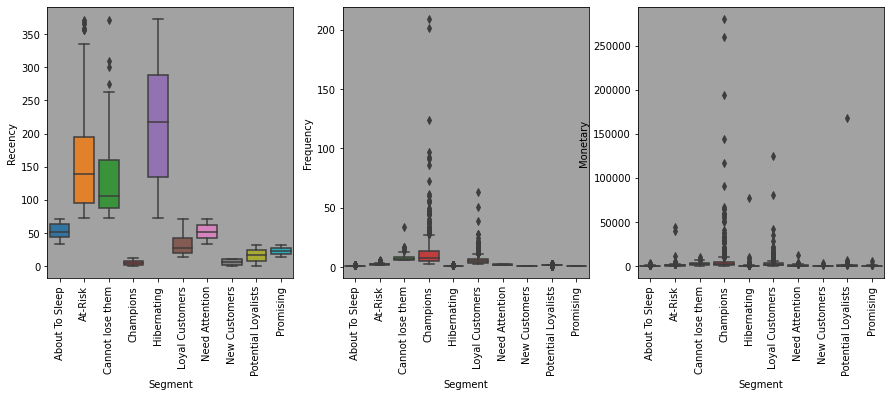

In [80]:
plt.figure(figsize=(15,5))
# df_rfm=df_rfm.sort_values('RFM_Points_Segments')

plt.subplot(1,3,1)
sns.boxplot(x=rfm_df['Segment'], y=rfm_df['Recency'])
plt.xticks(rotation=90)

plt.subplot(1,3,2)
sns.boxplot(x=rfm_df['Segment'],y= rfm_df['Frequency'])
plt.xticks(rotation=90)

plt.subplot(1,3,3)
sns.boxplot(x=rfm_df['Segment'], y=rfm_df['Monetary'])
plt.xticks(rotation=90)
plt.show()

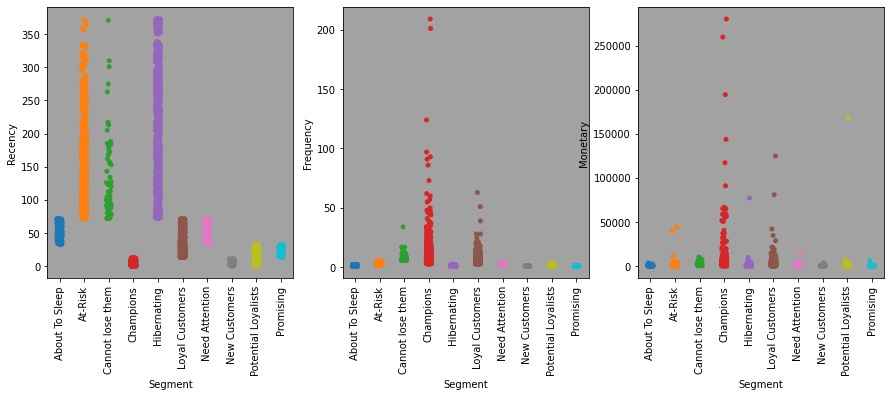

In [81]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.stripplot(x=rfm_df['Segment'], y=rfm_df['Recency'])
plt.xticks(rotation=90)

plt.subplot(1,3,2)
sns.stripplot(x=rfm_df['Segment'], y=rfm_df['Frequency'])
plt.xticks(rotation=90)

plt.subplot(1,3,3)
sns.stripplot(x=rfm_df['Segment'],y= rfm_df['Monetary'])
plt.xticks(rotation=90)
plt.show()

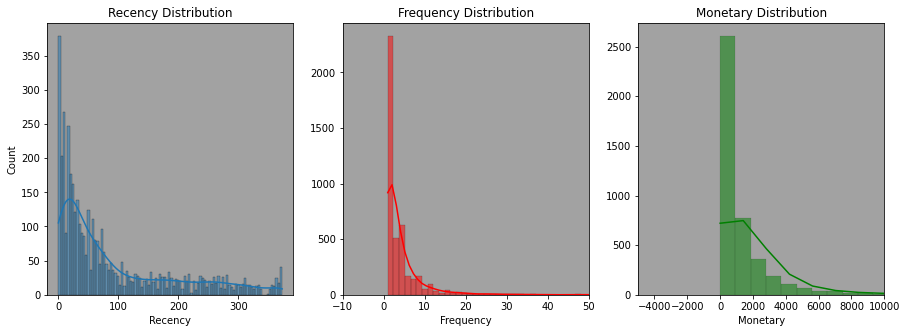

In [82]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.histplot(rfm_df.Recency,bins=100, kde=True)
plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Count')

plt.subplot(1,3,2)
sns.histplot(rfm_df['Frequency'],color='red',bins=150, kde=True)
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('')
plt.xlim(-10, 50)

plt.subplot(1,3,3)
sns.histplot(rfm_df['Monetary'],color='green',bins=300, kde=True)
plt.title('Monetary Distribution')
plt.xlabel('Monetary')
plt.ylabel('')
plt.xlim(-5000, 10000)
plt.show()

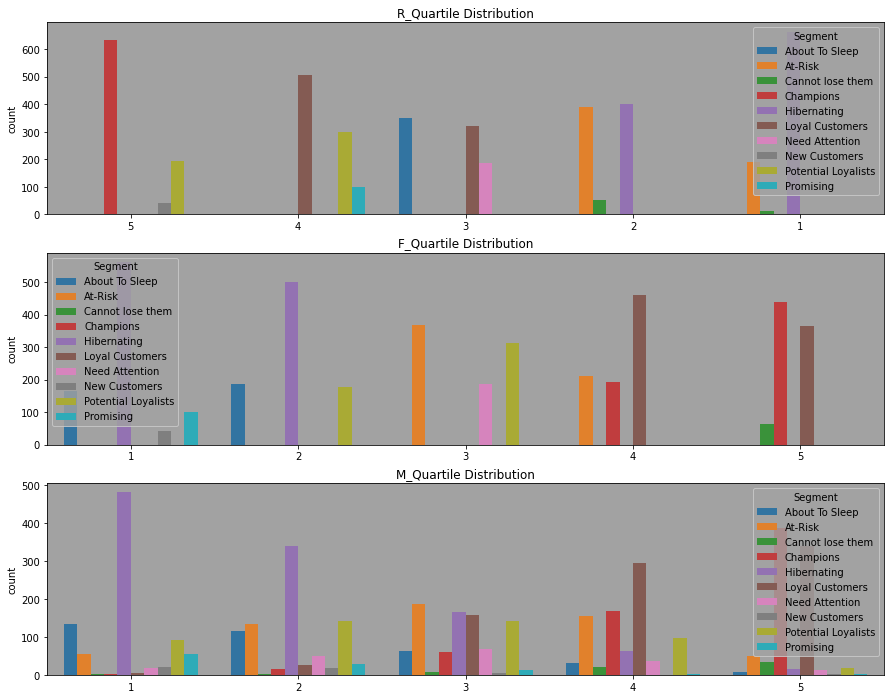

In [83]:
plt.figure(figsize=(15,12))

plt.subplot(3,1,1)
plt.title('R_Quartile Distribution')
sns.countplot(x='R', hue='Segment', data=rfm_df)
plt.xlabel('')

plt.subplot(3,1,2)
plt.title('F_Quartile Distribution')
sns.countplot(x='F',  hue='Segment', data=rfm_df)
plt.xlabel('')

plt.subplot(3,1,3)
plt.title('M_Quartile Distribution')
sns.countplot(x='M',  hue='Segment', data=rfm_df)
plt.xlabel('')
plt.show()

C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


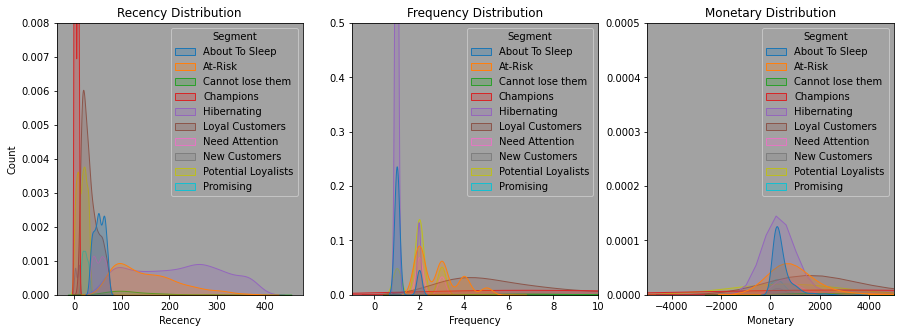

In [84]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.kdeplot(x='Recency',data=rfm_df,hue="Segment",shade=True)
plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Count')
plt.ylim(0, 0.008)

plt.subplot(1,3,2)
sns.kdeplot(x='Frequency',data=rfm_df,hue="Segment",shade=True)
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('')
plt.xlim(-1, 10)
plt.ylim(0, 0.5)

plt.subplot(1,3,3)
sns.kdeplot(x='Monetary',data=rfm_df,hue="Segment",shade=True)
plt.title('Monetary Distribution')
plt.xlabel('Monetary')
plt.ylabel('')
plt.xlim(-5000, 5000)
plt.ylim(0, 0.0005)
plt.show()

https://www.investopedia.com/terms/r/rfm-recency-frequency-monetary-value.asp